In [1]:
# Load the dataset and get the overall information:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,TransactionNumber,UserID,Age,Gender,Occupation,EducationLevel,MaritalStatus,NumDependents,Income,Expenditure,...,MerchantID,TransactionType,TransactionLocation,DeviceType,Latitude,Longitude,EmailDomain,Terrorism,UserTenure,IsFraud
0,8765,70,37,Female,Professional,Bachelor,Widowed,3,28884.43 AUD,14610.61 AUD,...,M006,Withdrawal,Adelaide,Mobile,-31.840233,145.612793,jon44@disposable.com,False,113,1
1,9645,3386,34,Male,Student,High School,Married,4,AU$ 54919.07,39169.49 AUD,...,M002,Withdrawal,Canberra,Mobile,-37.020100,144.964600,emilyreese@gmail.com,False,104,1
2,1145,2971,25,Male,Unemployed,Master,Married,2,AU$ 74728.57,55873.76 AUD,...,M008,Purchase,Brisbane,Mobile,-31.840233,145.612793,fordevan@gmail.com,False,105,0
3,15308,2925,25,Male,Professional,High School,Married,3,AU$ 55712.62,AED 89649.04,...,M001,Purchase,Darwin,iphone 15,-37.020100,144.964600,kathleenlewis@tempmail.com,False,70,1
4,14967,2339,38,Male,Professional,High School,Single,4,53004.7 AUD,AED 43601.02,...,M001,Withdrawal,MLB,Tablet,-37.020100,144.964600,kristinawhite@gmail.com,False,27,0


In [3]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.patches as mpatches

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [5]:
df.shape

(10966, 24)

## I. Data Cleaning:

In [8]:
# Check is is there any null value 
df.isnull().sum()

TransactionNumber       0
UserID                  0
Age                     0
Gender                  0
Occupation              0
EducationLevel          0
MaritalStatus           0
NumDependents           0
Income                  0
Expenditure             0
GiftsTransaction        0
TransactionDate         0
TransactionTime         0
TransactionAmount       0
MerchantID              0
TransactionType         0
TransactionLocation     0
DeviceType              0
Latitude               43
Longitude              43
EmailDomain             0
Terrorism               0
UserTenure              0
IsFraud                 0
dtype: int64

In [10]:
# Show unique Age values
df['Age'].unique()

array([   37,    34,    25,    38,    32,    18,    39,    21,    52,
          56,    41,   -24,    31,    35,    30,    29,    36,    28,
          42,    55,    40, 29000,    48, 24000,   -43,    26,    53,
         -29,    27,    43,    44,    33, 27000,    24,   -47,    19,
         -49,    51,    61, 42000,   -23,    46,    50,   -30,   -39,
       36000, 26000,   -26, 31000,    23,   -34,   -21,    47,    49,
         -45, 34000, 33000,   -40,   -31,   -32,   -18,   -38,   -42,
       47000,    54,    45,    20,    60, 28000,   -36, 45000, 49000,
       41000, 40000, 22000, 32000,    22, 39000,   -44,   -28, 55000,
       38000,   -27, 18000,    57, 35000, 21000,   -41, 37000,   -33,
          63,   -50,   -37,   -35, 25000,   -51,    59, 57000, 54000,
       61000, 46000,   -48,   -56, 20000,   -19,    58,   -46, 30000,
       48000, 60000, 43000, 53000, 23000,   -25, 50000,   -54,   -53,
       44000,   -52,   -68, 67000, 56000,    62,    66,   -55,   -22,
       58000, 52000,

In [12]:
# Function to shorten the age, if they are 5 digits remove to 2 digits only
def shorten_age(age):
    if abs(age) >= 1000:
        return int(str(age)[:2])  
    else:
        return age  

def positive_age(age):
    if age < 0: 
        return -age
    else:
        return age

df['Age'] = df['Age'].apply(shorten_age).apply(positive_age)
print(df['Age'].unique())


[37 34 25 38 32 18 39 21 52 56 41 24 31 35 30 29 36 28 42 55 40 48 43 26
 53 27 44 33 47 19 49 51 61 23 46 50 45 54 20 60 22 57 63 59 58 68 67 62
 66 64]


In [14]:
# Show unique DeviceType values
df['DeviceType'].unique()

array(['Mobile', 'iphone 15', 'Tablet', 'Desktop', 'android',
       'smartphone', 'mob', 'galaxys7'], dtype=object)

In [16]:
# Merge them into 3 groups: Desktop, Mobile, Table
df['DeviceType'] = df['DeviceType'].replace({'mob':'Mobile', 'iphone 15' : 'Mobile', 'android': 'Mobile', 'smartphone': 'Mobile', 'galaxys7': 'Mobile'}) 
df['DeviceType'].unique()


array(['Mobile', 'Tablet', 'Desktop'], dtype=object)

In [18]:
df['Gender'] = df['Gender'].replace({'he':'Male', 'man' : 'Male', 'isnotfemale': 'Male'})
df['Gender'] = df['Gender'].replace({'fem':'Female', 'isnotmale' : 'Female', 'woman': 'Female', 'she': 'Female'})
df['Gender'] = df['Gender'].replace('Male', '0')
df['Gender'] = df['Gender'].replace('Female', '1')
df['Gender'].unique()

array(['1', '0'], dtype=object)

In [20]:
# Replace inconsistent values
df['Income'] = df['Income'].str.replace('$','').str.replace( 'AU$' , '').str.replace('AUD' ,'').str.replace('AU', '').astype(float)
print(df['Income'].describe())

count     10966.000000
mean      71053.173947
std       31337.747245
min        5229.820000
25%       47117.830000
50%       66068.680000
75%       86905.020000
max      200354.470000
Name: Income, dtype: float64


In [22]:
# Convert Expenditure:
df['Expenditure'] = df['Expenditure'].replace({'AU$36604.93': '36604.93'}, regex=True)
# Clean the 'Expenditure' column by removing currency symbols and unwanted characters
df['Expenditure'] = df['Expenditure'].replace({'AU\$': '', 'AUD': '', 'AED': '', ' ': ''}, regex=True)

# Convert the cleaned column to numeric values
df['Expenditure'] = pd.to_numeric(df['Expenditure'], errors='coerce')

In [24]:
def change_currency(n):
    n = str(n)
    
    if n.endswith('AUD') or n.startswith('AU$'):
        n = n.replace('AU$', '').replace('AUD', '').strip()
        try:
            n = float(n)
            return n / 1.96  
        except ValueError:
            return None  
    else:
        n = n.replace('GBP', '').replace('£', '').replace('¬', '').strip()
        try:
            n = float(n)
            return n
        except ValueError:
            return None

In [26]:
df['GiftsTransaction'] = df['GiftsTransaction'].apply(change_currency)

In [28]:
df['TransactionAmount'] = df['TransactionAmount'].replace({'AU\$': '', 'AUD': '', 'AED': '', ' ': ''}, regex=True)

In [30]:
df = df.drop('TransactionNumber', axis = 1)
df = df.drop('UserID', axis = 1)

In [32]:
df['TransactionAmount'] = pd.to_numeric(df['TransactionAmount'], errors='coerce').astype('float64')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10966 entries, 0 to 10965
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  10966 non-null  int64  
 1   Gender               10966 non-null  object 
 2   Occupation           10966 non-null  object 
 3   EducationLevel       10966 non-null  object 
 4   MaritalStatus        10966 non-null  object 
 5   NumDependents        10966 non-null  int64  
 6   Income               10966 non-null  float64
 7   Expenditure          10966 non-null  float64
 8   GiftsTransaction     10966 non-null  float64
 9   TransactionDate      10966 non-null  object 
 10  TransactionTime      10966 non-null  object 
 11  TransactionAmount    10966 non-null  float64
 12  MerchantID           10966 non-null  object 
 13  TransactionType      10966 non-null  object 
 14  TransactionLocation  10966 non-null  object 
 15  DeviceType           10966 non-null 

In [36]:
df = df.drop('EmailDomain', axis = 1)
df = df.drop('Latitude', axis = 1)
df = df.drop('Longitude', axis = 1)

In [38]:
df.nunique()

Age                      50
Gender                    2
Occupation                4
EducationLevel            4
MaritalStatus             4
NumDependents             5
Income                 4423
Expenditure            5836
GiftsTransaction       5828
TransactionDate         364
TransactionTime        9851
TransactionAmount      9897
MerchantID                8
TransactionType           4
TransactionLocation      34
DeviceType                3
Terrorism                 2
UserTenure              119
IsFraud                   2
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10966 entries, 0 to 10965
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  10966 non-null  int64  
 1   Gender               10966 non-null  object 
 2   Occupation           10966 non-null  object 
 3   EducationLevel       10966 non-null  object 
 4   MaritalStatus        10966 non-null  object 
 5   NumDependents        10966 non-null  int64  
 6   Income               10966 non-null  float64
 7   Expenditure          10966 non-null  float64
 8   GiftsTransaction     10966 non-null  float64
 9   TransactionDate      10966 non-null  object 
 10  TransactionTime      10966 non-null  object 
 11  TransactionAmount    10966 non-null  float64
 12  MerchantID           10966 non-null  object 
 13  TransactionType      10966 non-null  object 
 14  TransactionLocation  10966 non-null  object 
 15  DeviceType           10966 non-null 

In [42]:
# Get all the categorical columns:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('TransactionDate')
categorical_columns = categorical_columns.drop('TransactionTime')
categorical_columns = categorical_columns.drop('TransactionLocation')
categorical_columns = categorical_columns.drop('MerchantID')


In [44]:
encode1 = LabelEncoder()
df['TransactionLocation'] = encode1.fit_transform(df['TransactionLocation'])
df['Terrorism'] = encode1.fit_transform(df[['Terrorism']])
df['TransactionDate'] = encode1.fit_transform(df['TransactionDate'])
df['TransactionTime'] = encode1.fit_transform(df['TransactionTime'])
df['MerchantID'] = encode1.fit_transform(df['MerchantID'])


In [46]:
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=categorical_columns, dtype = int)

In [48]:
df.corr()

,Age,NumDependents,Income,Expenditure,GiftsTransaction,TransactionDate,TransactionTime,TransactionAmount,MerchantID,TransactionLocation,...,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,TransactionType_Payment,TransactionType_Purchase,TransactionType_Transfer,TransactionType_Withdrawal,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet
Age,1.000000,-0.007555,-0.002261,0.003057,0.003123,-0.001979,0.017224,0.016036,-0.008551,-0.011026,...,-0.021962,0.027019,0.004942,0.009242,-0.003630,-0.001534,-0.000926,-0.003791,0.008878,-0.008626
NumDependents,-0.007555,1.000000,-0.011646,-0.009138,0.004421,0.019828,0.041729,-0.000446,-0.016706,-0.000057,...,-0.005960,0.018214,-0.005496,-0.007517,0.002632,0.007805,-0.005497,0.001444,-0.009242,0.012769
Income,-0.002261,-0.011646,1.000000,0.597747,0.431100,-0.025761,-0.007483,0.008416,-0.001703,0.001453,...,0.017562,-0.024108,-0.002174,-0.013654,0.004207,-0.008350,0.013592,-0.026678,0.016934,0.013008
Expenditure,0.003057,-0.009138,0.597747,1.000000,0.259924,-0.029311,-0.015316,0.126804,0.006563,-0.006627,...,0.019115,-0.025150,0.008422,0.009461,0.007012,-0.015333,-0.000473,-0.018773,0.013155,0.007148
GiftsTransaction,0.003123,0.004421,0.431100,0.259924,1.000000,-0.004367,-0.002352,-0.003401,-0.018350,-0.011614,...,0.030846,-0.037878,-0.005101,0.002814,-0.007282,0.004795,0.002146,-0.015516,0.006969,0.012226
TransactionDate,-0.001979,0.019828,-0.025761,-0.029311,-0.004367,1.000000,0.050213,-0.047758,0.011930,0.004986,...,0.029055,-0.018381,-0.001299,-0.016467,0.023000,-0.008192,-0.008054,-0.000617,0.002792,-0.003584
TransactionTime,0.017224,0.041729,-0.007483,-0.015316,-0.002352,0.050213,1.000000,-0.042269,-0.010051,0.011843,...,0.011505,0.004374,0.005410,-0.001029,0.003224,-0.013643,0.010573,0.004796,-0.008599,0.006650
TransactionAmount,0.016036,-0.000446,0.008416,0.126804,-0.003401,-0.047758,-0.042269,1.000000,-0.005064,-0.023205,...,0.015437,-0.020693,0.012779,0.018093,-0.003844,0.004536,-0.013563,0.003657,-0.008920,0.008896
MerchantID,-0.008551,-0.016706,-0.001703,0.006563,-0.018350,0.011930,-0.010051,-0.005064,1.000000,-0.017701,...,-0.003745,0.010525,-0.004934,0.005842,0.017834,-0.005643,-0.021154,-0.006417,0.004819,0.001922
TransactionLocation,-0.011026,-0.000057,0.001453,-0.006627,-0.011614,0.004986,0.011843,-0.023205,-0.017701,1.000000,...,-0.005859,0.006792,0.015609,0.007661,-0.003476,-0.004527,0.003123,0.017584,-0.014175,-0.003697


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10966 entries, 0 to 10965
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         10966 non-null  int64  
 1   NumDependents               10966 non-null  int64  
 2   Income                      10966 non-null  float64
 3   Expenditure                 10966 non-null  float64
 4   GiftsTransaction            10966 non-null  float64
 5   TransactionDate             10966 non-null  int64  
 6   TransactionTime             10966 non-null  int64  
 7   TransactionAmount           10966 non-null  float64
 8   MerchantID                  10966 non-null  int64  
 9   TransactionLocation         10966 non-null  int64  
 10  Terrorism                   10966 non-null  int64  
 11  UserTenure                  10966 non-null  int64  
 12  IsFraud                     10966 non-null  int64  
 13  Gender_0                    109

In [52]:
from sklearn. linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn. model_selection import train_test_split 
from sklearn.metrics import accuracy_score

X = df.drop(columns=['IsFraud']) 
y = df['IsFraud']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic regression

In [55]:
# Create an instance of the StandardScaler for normalization
scaler = StandardScaler ()

# Normalize the features in X
X_train_normalized = scaler.fit_transform(X_train)

# Create an instance of Logistic Regression
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train_normalized, y_train)

# Get the best fitted line:
print("y = x *", logreg.coef_, "+", logreg.intercept_)

# Normalize the features in X
X_test_normalized = scaler.fit_transform(X_test)

# Testing the model:
y_pred = logreg.predict(X_test_normalized)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Evaluate the model:
# Doing evaluation
print("The accuracy score is: ", accuracy_score(y_test, y_pred))

y = x * [[ 3.34225337e-03 -8.74017316e-03 -4.96485007e-04 -8.20292992e-02
   3.77196548e-03 -9.94336132e-02 -2.75846398e+00  6.17845602e-01
   4.41896257e-02 -3.76818707e-01  8.91894648e-02  3.34548928e-02
   2.13412070e-02 -2.13412070e-02 -2.34478954e-02  8.31701831e-03
   4.20568680e-02 -3.27043810e-02  2.59183579e-02 -1.32247469e-02
  -1.23826452e-02 -7.98064275e-03  1.92271918e-02  2.55829034e-02
  -2.68554864e-02 -1.80750409e-02 -5.51426125e-01 -8.50610506e-01
  -7.02876999e-01  2.19909292e+00 -2.17251025e-02 -7.72611890e-04
   3.42485007e-02]] + [-1.3323877]
F1 Score: 0.8655980271270036
The accuracy score is:  0.9006381039197813


In [57]:
# Creating RFE object
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=3, step=1)
rfe.fit(X_train_normalized, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=3)

In [59]:
# Doing evaluation
y_test_hat = rfe.predict(X_test_normalized)
print("The accuracy score is: ", accuracy_score(y_test, y_test_hat))

The accuracy score is:  0.9047402005469463


In [61]:
# Summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 29.000
Column: 1, Selected False, Rank: 23.000
Column: 2, Selected False, Rank: 31.000
Column: 3, Selected False, Rank: 8.000
Column: 4, Selected False, Rank: 28.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 13.000
Column: 9, Selected False, Rank: 5.000
Column: 10, Selected False, Rank: 7.000
Column: 11, Selected False, Rank: 16.000
Column: 12, Selected False, Rank: 12.000
Column: 13, Selected False, Rank: 19.000
Column: 14, Selected False, Rank: 9.000
Column: 15, Selected False, Rank: 24.000
Column: 16, Selected False, Rank: 18.000
Column: 17, Selected False, Rank: 10.000
Column: 18, Selected False, Rank: 14.000
Column: 19, Selected False, Rank: 25.000
Column: 20, Selected False, Rank: 26.000
Column: 21, Selected False, Rank: 27.000
Column: 22, Selected False, Rank: 17.000
Column: 23, Selected False, Rank: 11.000
Column: 24, Selected False, Rank: 2

In [63]:
# To increment number of features, one at each time
acc_scores = []
for i in range(1,33):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # Training model
    rfe.fit(X_train_normalized, y_train)
    # Predicting on test set
    y_pred = rfe.predict(X_test_normalized)
    acc_score = accuracy_score(y_test, y_pred)
    # Print this
    print("Accuracy on test set using", i, "features: ", acc_score)
    # Append to the list
    acc_scores.append(acc_score)

Accuracy on test set using 1 features:  0.7835004557885141
Accuracy on test set using 2 features:  0.9079307201458523
Accuracy on test set using 3 features:  0.9047402005469463
Accuracy on test set using 4 features:  0.9042844120328167
Accuracy on test set using 5 features:  0.9033728350045579
Accuracy on test set using 6 features:  0.9038286235186873
Accuracy on test set using 7 features:  0.9079307201458523
Accuracy on test set using 8 features:  0.9070191431175935
Accuracy on test set using 9 features:  0.9070191431175935
Accuracy on test set using 10 features:  0.9056517775752051
Accuracy on test set using 11 features:  0.9061075660893345
Accuracy on test set using 12 features:  0.9070191431175935
Accuracy on test set using 13 features:  0.9020054694621695
Accuracy on test set using 14 features:  0.9038286235186873
Accuracy on test set using 15 features:  0.9010938924339107
Accuracy on test set using 16 features:  0.9033728350045579
Accuracy on test set using 17 features:  0.902005

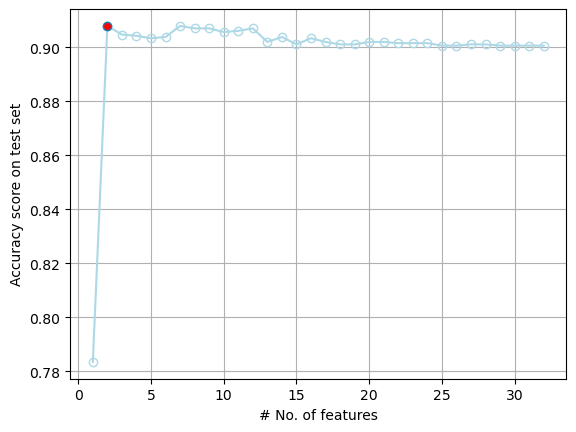

In [73]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 33):
    selector = RFE(estimator,n_features_to_select=i)
    selector = selector.fit(X_train_normalized, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test_normalized)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)

best = 1
for item1 in acc_scores:
    if item1 > acc_scores[best - 1]:
        best = acc_scores.index(item1) + 1
plt.grid()
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 33), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'red')

In [74]:
print("The best number of features for accuracy score is:", best)

The best number of features for accuracy score is: 2


In [75]:
# Training Logistic Regression model
model = LogisticRegression()
model.fit(X_train_normalized, y_train)
# Doing predictions on train and test set
y_hat_train = model.predict(X_train_normalized)
y_hat_test = model.predict(X_test_normalized)

In [76]:
# Evaluate the performance of the trained model
print("Accuracy score on training set: ", accuracy_score(y_train, y_hat_train))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_hat_test))
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(y_test, y_hat_test))
print("Confusion matrix on train set: ")
print(confusion_matrix(y_train, y_hat_train))

Accuracy score on training set:  0.9024167806657547
Accuracy score on testing set:  0.9006381039197813
Confusion matrix on test set: 
[[1274   94]
 [ 124  702]]
Confusion matrix on train set: 
[[5172  431]
 [ 425 2744]]


### Decision Tree

In [82]:
# Create and train a Decision Tree classifier model
dtree = DecisionTreeClassifier()
dtree.fit(X_train_normalized, y_train)

# Evaluate the model
dtree_y_pred = dtree.predict(X_test_normalized)
dtree_accuracy = accuracy_score(y_test, dtree_y_pred)
dtree_f1 = f1_score(y_test,dtree_y_pred)
print('The accuracy score is:', dtree_accuracy)
print('The f1 score is:', dtree_f1)

The accuracy score is: 0.9585232452142206
The f1 score is: 0.9444783404514948


In [84]:
# To increment number of features, one at each time
acc_scores = []
for i in range(1,33):
    dt = DecisionTreeClassifier()
    rfe_new = RFE(estimator=dt, n_features_to_select=i)
    # Training model
    rfe_new.fit(X_train_normalized, y_train)
    # Predicting on test set
    y_pred = rfe_new.predict(X_test_normalized)
    acc_score = accuracy_score(y_test, y_pred)
    # Print this
    print("Accuracy on test set using", i, "features: ", acc_score)
    # Append to the list
    acc_scores.append(acc_score)

Accuracy on test set using 1 features:  0.7210574293527803
Accuracy on test set using 2 features:  0.8837739288969918
Accuracy on test set using 3 features:  0.9498632634457612
Accuracy on test set using 4 features:  0.9544211485870556
Accuracy on test set using 5 features:  0.9516864175022789
Accuracy on test set using 6 features:  0.9571558796718322
Accuracy on test set using 7 features:  0.9544211485870556
Accuracy on test set using 8 features:  0.9539653600729262
Accuracy on test set using 9 features:  0.9512306289881495
Accuracy on test set using 10 features:  0.9576116681859617
Accuracy on test set using 11 features:  0.955788514129444
Accuracy on test set using 12 features:  0.9571558796718322
Accuracy on test set using 13 features:  0.955788514129444
Accuracy on test set using 14 features:  0.955788514129444
Accuracy on test set using 15 features:  0.9535095715587967
Accuracy on test set using 16 features:  0.9576116681859617
Accuracy on test set using 17 features:  0.957611668

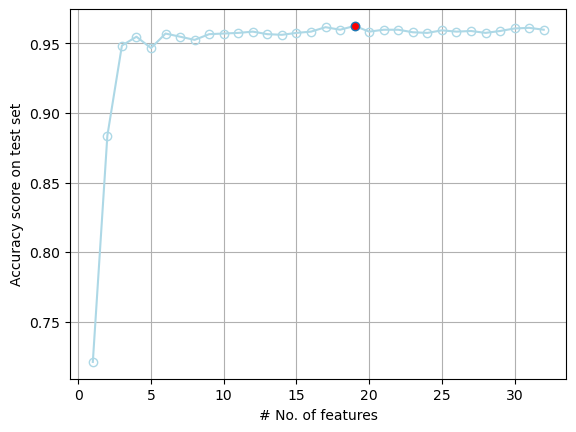

In [86]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = DecisionTreeClassifier()
acc_scores = []
f1_scores = []
for i in range(1, 33):
    selector = RFE(estimator,n_features_to_select=i)
    selector = selector.fit(X_train_normalized, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test_normalized)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)
    

best = 1
for item1 in acc_scores:
    if item1 > acc_scores[best - 1]:
        best = acc_scores.index(item1) + 1
plt.grid()
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 33), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'red')

In [88]:
# Get the number of features that has the maximisation performance
print("The number of features for best accuracy score:", best)

The number of features for best accuracy score: 19


In [90]:
# Training Logistic Regression model
model = DecisionTreeClassifier()
model.fit(X_train_normalized, y_train)
# Doing predictions on train and test set
y_hat_train = model.predict(X_train_normalized)
y_hat_test = model.predict(X_test_normalized)
# Evaluate the performance of the trained model
print("Accuracy score on training set: ", accuracy_score(y_train, y_hat_train))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_hat_test))
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(y_test, y_hat_test))
print("Confusion matrix on train set: ")
print(confusion_matrix(y_train, y_hat_train))

Accuracy score on training set:  1.0
Accuracy score on testing set:  0.959890610756609
Confusion matrix on test set: 
[[1326   42]
 [  46  780]]
Confusion matrix on train set: 
[[5603    0]
 [   0 3169]]


### KNN Classifier Model:

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [95]:
# Import the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN classifier model
clf_knn = KNeighborsClassifier(n_neighbors=1)

# Train the model with the training data with new features selected
clf_knn.fit(X_train_normalized, y_train)

KNeighborsClassifier(n_neighbors=1)

In [97]:
y_pred_new = clf_knn.predict(X_test_normalized)
accuracy = accuracy_score(y_test, y_pred_new)
print("The accuracy score for testing is:", accuracy)
print("The f1 score for testing is:", f1_score(y_test, y_pred_new))

The accuracy score for testing is: 0.7889699179580675
The f1 score for testing is: 0.6995457495133031


In [99]:
y_pred_train_new = clf_knn.predict(X_train_normalized)
print("The accuracy score for training is:", accuracy_score(y_train, y_pred_train_new))
print("The f1 score for training is:", f1_score(y_train, y_pred_train_new))

The accuracy score for training is: 1.0
The f1 score for training is: 1.0


In [101]:
parameter_grid = {'n_neighbors': range(1,31)}
knn_clf = KNeighborsClassifier()
gs_knn = GridSearchCV(knn_clf, parameter_grid, cv=5, scoring='accuracy')
gs_knn.fit(X_train_normalized, y_train)

print('Best K value: ', gs_knn.best_params_['n_neighbors'])
print('The accuracy: %.4f\n' % gs_knn.best_score_)

Best K value:  15
The accuracy: 0.8129



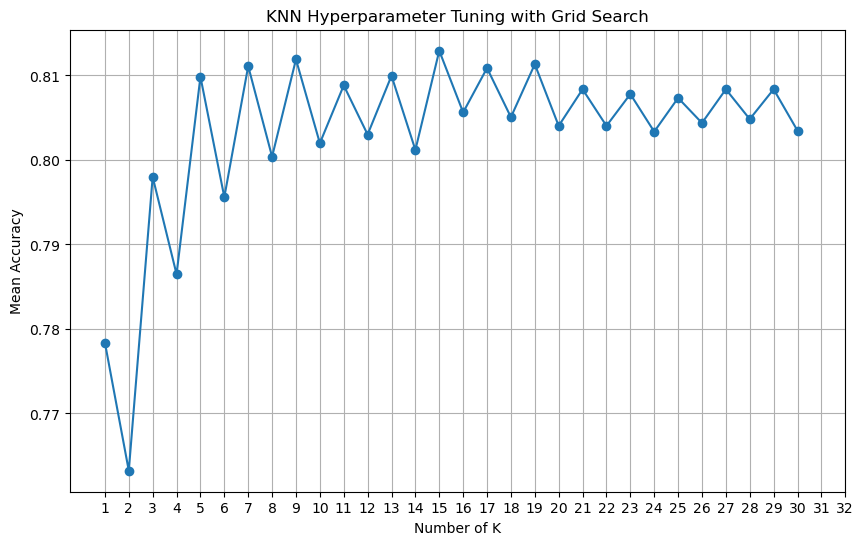

In [103]:
# Visualise the performance change with respect to K using a line chart
import numpy as np
k_values = gs_knn.cv_results_['param_n_neighbors'].data
mean_test_scores = gs_knn.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o')
plt.title('KNN Hyperparameter Tuning with Grid Search')
plt.xlabel('Number of K')
plt.ylabel('Mean Accuracy')
plt.xticks(np.arange(1, 33, step=1))
plt.grid()
plt.show()

In [105]:
#Get the metrics for the best case:
best_clf = KNeighborsClassifier(n_neighbors = 15)
best_clf.fit(X_train_normalized, y_train)
y_for_pred = best_clf.predict(X_test_normalized)
print("The accuracy score is:", accuracy_score(y_test, y_for_pred))
print("The f1 score is:", f1_score(y_test, y_for_pred))

The accuracy score is: 0.8067456700091158
The f1 score is: 0.6849925705794947


In [107]:
# Run the model with l1 metrics:
knn_l1 = KNeighborsClassifier(n_neighbors=15, metric='l1')
knn_l1.fit(X_train_normalized, y_train)
y_l1 = knn_l1.predict(X_test_normalized)
print("The accuracy score is:", accuracy_score(y_test, y_l1))
print("The f1 score is:", f1_score(y_test, y_l1))

The accuracy score is: 0.8263445761166819
The f1 score is: 0.7233115468409587


In [109]:
# Run the model with cosine metrics:
knn_cosine = KNeighborsClassifier(n_neighbors=15, metric='cosine')
knn_cosine.fit(X_train_normalized, y_train)
y_cosine = knn_cosine.predict(X_test_normalized)
print("The accuracy score is:", accuracy_score(y_test, y_cosine))
print("The f1 score is:", f1_score(y_test, y_cosine))

The accuracy score is: 0.8176845943482224
The f1 score is: 0.7101449275362319


### Random Forest:

In [112]:
# Create and train a Random Forest classifier model
rf = RandomForestClassifier()
rf.fit(X_train_normalized, y_train)

# Evaluate the model
rf_y_pred = rf.predict(X_test_normalized)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
print('The accuracy score is:', rf_accuracy)
print('The f1 score is:', rf_f1)

The accuracy score is: 0.9708295350957156
The f1 score is: 0.9615846338535414


In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

acc_scores = []
rf = RandomForestClassifier()

for i in range(1, 33):
    rfe_new = RFE(estimator=rf, n_features_to_select=i)
    rfe_new.fit(X_train_normalized, y_train)
    y_pred = rfe_new.predict(X_test_normalized)
    acc_score = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set using {i} features: {acc_score}")
    acc_scores.append(acc_score)


Accuracy on test set using 1 features: 0.7215132178669098
Accuracy on test set using 2 features: 0.8842297174111212
Accuracy on test set using 3 features: 0.9462169553327257
Accuracy on test set using 4 features: 0.9685505925250684
Accuracy on test set using 5 features: 0.9690063810391978
Accuracy on test set using 6 features: 0.9726526891522334
Accuracy on test set using 7 features: 0.9721969006381039
Accuracy on test set using 8 features: 0.9731084776663628
Accuracy on test set using 9 features: 0.9740200546946217
Accuracy on test set using 10 features: 0.9731084776663628
Accuracy on test set using 11 features: 0.9726526891522334
Accuracy on test set using 12 features: 0.9726526891522334
Accuracy on test set using 13 features: 0.9708295350957156
Accuracy on test set using 14 features: 0.9717411121239745
Accuracy on test set using 15 features: 0.9726526891522334
Accuracy on test set using 16 features: 0.9726526891522334
Accuracy on test set using 17 features: 0.9726526891522334
Accura

The best number of features for accuracy score is: 8


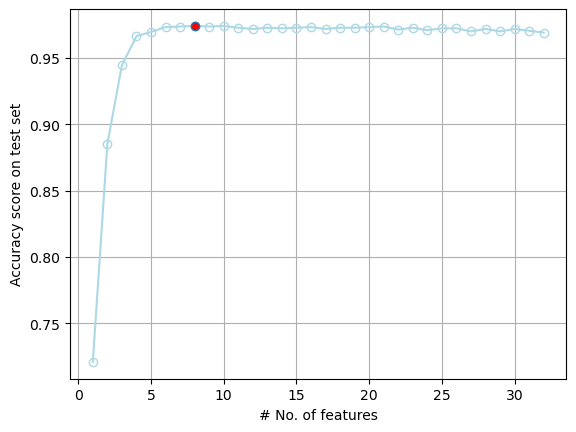

In [116]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = RandomForestClassifier()
acc_scores = []
for i in range(1, 33):
    selector = RFE(estimator,n_features_to_select=i)
    selector = selector.fit(X_train_normalized, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test_normalized)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)
    

best = 1
for item1 in acc_scores:
    if item1 > acc_scores[best - 1]:
        best = acc_scores.index(item1) + 1
plt.grid()
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 33), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'red')
print("The best number of features for accuracy score is:", best)

In [118]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_normalized, y_train)
xgb_y_pred = xgb_clf.predict(X_test_normalized)

# Evaluate the model: 
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred, average='weighted')

print('The Accuracy:', xgb_accuracy)
print('The F1 Score:', xgb_f1)

The Accuracy: 0.9594348222424794
The F1 Score: 0.9593800823475592


In [120]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search to tune the parameter 
grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), param_grid, 
                           scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train_normalized, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_normalized)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred))


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}
Best Model Accuracy: 0.9721969006381039


In [ ]:
import streamlit as st
import shap 

In [ ]:
st.write("""
# Fraud Transaction Detection App

This app helps to detect illegal transaction
""")
st.write('---')


In [ ]:
# Sidebar
# Header of Specify Input Parameters
st.sidebar.header('Specify Input Parameters')

In [ ]:
import streamlit as st
import pandas as pd

def user_input_features():
    st.sidebar.header("User Input Features")

    # Numerical Inputs
    Age = st.sidebar.slider('Age', min_value=0, max_value=100, value=10)
    NumDependents = st.sidebar.slider('Number of Dependents', min_value=0, max_value=10, value=1)
    UserTenure = st.sidebar.slider('User Tenure (Months)', min_value=0, max_value=240, value=12)
    Income = st.sidebar.slider('User Income', min_value=0, max_value=1000000, value=20000)
    Expenditure = st.sidebar.slider('Expenditure', min_value=0, max_value=1000000, value=20000)

    # Categorical Inputs (Using selectbox)
    Gender = st.sidebar.selectbox('Gender', ['Male', 'Female', 'Other'])
    Occupation = st.sidebar.selectbox('Occupation', ['Student', 'Professional', 'Self-Employed', 'Retired'])
    EducationLevel = st.sidebar.selectbox('Education Level', ['High School', 'Bachelors', 'Masters', 'PhD'])
    MaritalStatus = st.sidebar.selectbox('Marital Status', ['Single', 'Married', 'Divorced', 'Widowed'])
    TransactionType = st.sidebar.selectbox('Transaction Type', ['Online', 'In-store'])
    DeviceType = st.sidebar.selectbox('Device Type', ['Mobile', 'Desktop', 'Tablet'])
    # Transaction Amount 
    TransactionAmount = st.sidebar.number_input('Transaction Amount ($)', min_value=0.0, max_value=10000.0, value=50.0)

    # Transaction Date 
    TransactionDate = st.sidebar.date_input('Transaction Date')

    # Terrorism Flag 
    Terrorism = st.sidebar.checkbox('Terrorism')

    # Latitude & Longitude (Handling missing values)
    Latitude = st.sidebar.number_input('Latitude', value=0.0, format="%.6f")
    Longitude = st.sidebar.number_input('Longitude', value=0.0, format="%.6f")

    # Create DataFrame
    data = {
        'Age': Age,
        'NumDependents': NumDependents,
        'UserTenure': UserTenure,
        'Gender': Gender,
        'Occupation': Occupation,
        'EducationLevel': EducationLevel,
        'MaritalStatus': MaritalStatus,
        'Income': Income,
        'Expenditure': Expenditure,
        'TransactionType': TransactionType,
        'DeviceType': DeviceType,
        'TransactionAmount': TransactionAmount,
        'TransactionDate': str(TransactionDate),
        'Terrorism': int(Terrorism),
        'Latitude': Latitude,
        'Longitude': Longitude
    }

    # Convert to DataFrame
    return pd.DataFrame(data, index=[0])


# Run function and display user inputs
input_features = user_input_features()
st.write("User Input Features:", input_features)